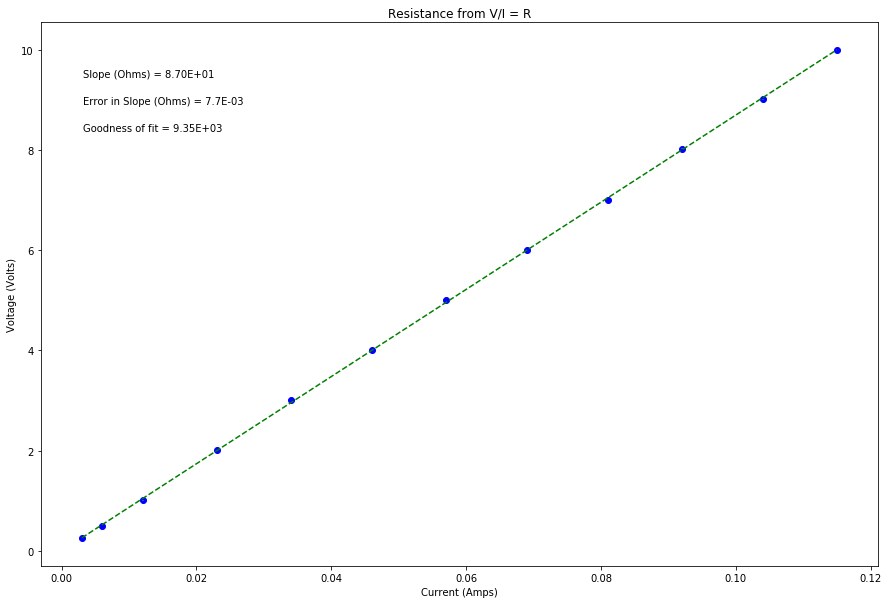

In [4]:

#-------------------------------------------#
%matplotlib inline
#Import packages and libraries needed and give them shortcut names
import numpy as np
import matplotlib.pyplot as plt

#-------------------------------------------#
#Data Section - Create Arrays for data. Perform necessary calculations
#CHANGE THE VARIABLE NAMES and numbers to match your data
current = np.array([0.003, 0.006, 0.012, 0.023, 0.034, 0.046, 0.057, 0.069, 0.081, 0.092, 0.104, 0.115]) #what are units?
volt = np.array([0.251, 0.499, 1.003, 2.004, 3.005, 4.003, 4.997, 5.998, 7.010, 8.030, 9.010, 10.000]) #what are units?


#--------------------------------------------#
#Create arrays for uncertainties
#CHANGE THE VARIABLE NAME and numbers to match your data 
volterr = np.array([0.001, 0.001, 0.001, 0.001, 0.001, 0.001,\
                 0.001, 0.001, 0.001, 0.001, 0.001, 0.001])


#--------------------------------------------#
#Re-assign variables as x, y, dy so that the following code may remain generic

x = current   #this should be the array you want to plot on the x axis
y = volt
dy = volterr  #this should be your error in y array

#----------------------------------------------#
#Don't need to change anything in this section!
 
#Find the intercept and slope, b and m, from Python's polynomial fitting function
b,m=np.polynomial.polynomial.polyfit(x,y,1,w=dy)

#Write the equation for the best fit line based on the slope and intercept
fit = b+m*x

#Calculate the error in slope and intercept 
#def Delta(x, dy) is a function, and we will learn how to write our own at a later date. They are very useful!
def Delta(x, dy):
    D = (sum(1/dy**2))*(sum(x**2/dy**2))-(sum(x/dy**2))**2
    return D
 
D=Delta(x, dy)
 
dm = np.sqrt(1/D*sum(1/dy**2)) #error in slope
db = np.sqrt(1/D*sum(x**2/dy**2)) #error in intercept

#Calculate the "goodness of fit" from the linear least squares fitting document
def LLSFD2(x,y,dy):
    N = sum(((y-b-m*x)/dy)**2)
    return N
                      
N = LLSFD2(x,y,dy)

#-----------------------------------------------------------------------#
#Plot data on graph. Plot error bars and place values for slope, error in slope and goodness of fit on the plot using "annotate"
plt.figure(figsize=(15,10))
 
plt.plot(x, fit, color='green', linestyle='--')
plt.scatter(x, y, color='blue', marker='o')
 
 
#create labels  YOU NEED TO CHANGE THESE!!!
plt.xlabel('Current (Amps)')
plt.ylabel('Voltage (Volts)')
plt.title('Resistance from V/I = R')
 
plt.errorbar(x, y, yerr=dy, xerr=None, fmt="none") #don't need to plot x error bars
 
plt.annotate('Slope (Ohms) = {value:.{digits}E}'.format(value=m, digits=2),
             (0.05, 0.9), xycoords='axes fraction')
 
plt.annotate('Error in Slope (Ohms) = {value:.{digits}E}'.format(value=dm, digits=1),
             (0.05, 0.85), xycoords='axes fraction')
 
plt.annotate('Goodness of fit = {value:.{digits}E}'.format(value=N, digits=2),
             (0.05, 0.80), xycoords='axes fraction')

plt.show()


In [10]:
import numpy as np
import matplotlib.pyplot as plt
def rule4(dA,A,m,dB,B,n,dC,C,p,Q):
    dQ = Q*np.sqrt(((m*dA/A)**2)+((n*dB/B)**2)+((p*dC/C)**2))
    return dQ
vtot = 5.000
v1 = .970
i1 = .041
r1 = v1/i1
v2 = 4.003
i2 = .041
r2 = v2/i2
vboth = 4.973
iboth = .041
rboth = vboth/iboth
verr = .001
ierr = .001
rerr = rule4(verr, v1, 1, ierr, i1, 1, 0, 1, 1, r1)
print("r1 = {:.3f} ohms, r2 = {:.3f} ohms, rboth = {:.3f} ohms, rerr = {:.3f} ohms".format(r1, r2, rboth, rerr),"\n")
print()

vptot = 5.002
vp1 = 4.884
ip1 = .210
rp1 = vp1/ip1
vp2 = 4.928
ip2 = .050
rp2 = vp2/ip2
vmtot = (vp1+vp2)/2
iptot = ip1+ip2
print("mvtot = {:.3f} volts, iptot = {:.3f} amps".format(vmtot, iptot),"\n")
print("rp1 = {:.3f} ohms, rp2 = {:.3f} ohms, rerr = {:.3f} ohms".format(rp1, rp2, rerr),"\n")

r1 = 23.659 ohms, r2 = 97.634 ohms, rboth = 121.293 ohms, rerr = 0.578 ohms 


mvtot = 4.906 volts, iptot = 0.260 amps 

rp1 = 23.257 ohms, rp2 = 98.560 ohms, rerr = 0.578 ohms 

